,age,height,gender
0,33.7,170.6,male
1,31.1,185.3,male
2,30.5,166.3,male
3,34.0,180.4,male
4,35.6,181.7,male
...,...,...,...
1995,28.8,164.6,female
1996,29.1,185.6,female
1997,25.4,177.9,female
1998,26.2,169.7,female


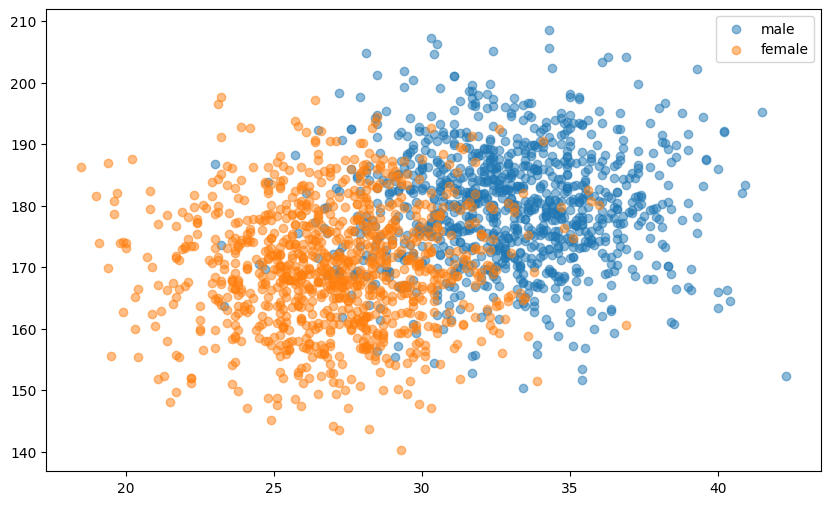

In [65]:
import pandas as pd
import random
import matplotlib.pyplot as plt

class ClusterGenerator():
    def column(self, name, center=30, spread=5):
        return name, center, spread

    def generate(self, rows, columns):
        return pd.DataFrame(dict(map(lambda x: (x[0], [round(random.gauss(x[1], x[2]), 1) for _ in range(rows)]), columns)))

cg = ClusterGenerator()

male_df = cg.generate(1000, [
        cg.column('age', center=33, spread=3),
        cg.column('height', center=180, spread=10)
        ])
male_df['gender'] = 'male'

female_df = cg.generate(1000, [
        cg.column('age', center=27, spread=3),
        cg.column('height', center=170, spread=10)
        ])
female_df['gender'] = 'female'

df = pd.concat([male_df, female_df]).reset_index(drop=True)
display(df)

plt.figure(figsize=(10,6))
for gender in df.gender.unique():
    plt.scatter(
    df[df.gender == gender]['age'],
    df[df.gender == gender]['height'],
    alpha = 0.5,
    label = gender
    )
plt.legend()
plt.show()